

Content of The Titanic Exploratory Data Analysis
1. [Chapter-1 Data Load and Check](#1)
    * [1-Outlier Detection](#2)
    * [2-Joining Test and Train Data](#3)
    * [3-Feature Check](#4)
1. [Chapter-2 Data Analysis](#5)
    * [1-Feature Analysis](#6)
    * [2-Correlation Between Feature](#7)
1. [Chapter-3 Missing Value](#8)
    * [1-Find Missing Value](#9)
    * [2-Fill Missing Value](#10)
1. [Chapter-4 Data Engineering](#11)
    * [1-New Feature](#12)
    * [2-Drop Feature](#13)
    * [3-One Hot Encoding](#14)
1. [Chapter-5 Modeling](#16)
    * [1-Train-Test Split](#17)
    * [2-Classification Methods](#18)
    * [3-Ensemble Modeling](#19)
    * [4-Result](#20)


   
    
    
    
    



    
    
    

<a id='1'></a><br>
# Chapter:1 Data Load And Check

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")


train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <a id='2'></a><br>
## 1-Outlier Detection


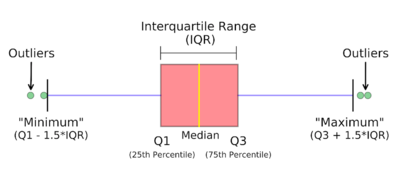

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)



In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    #If there are three or more outlier data features we must delete them. (n)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [7]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

<a id='3'></a><br>
## 2-Combining Train and Test Data


* Train_data and test_data are combined so that data is obtained. 


In [9]:
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

<a id='4'></a><br>
## 3-Feature Analysis

Object
1. Name        : 
1. Sex         : male and female
1. Ticket      : ticket number
1. Cabin       : cabin category
1. Embarked    : port C, Q and S

Int64
1. PassengerId : unique id number
1. Survived    : 0 -> died ,1-> survived
1. Pclasss     : 1, 2 and 3 
1. SibSp       : number of siblings/spouse
1. Parch       : number of parent/children

Float64
1. Age         : age of passenger
1. Fare        : price of the ticket

### Survived

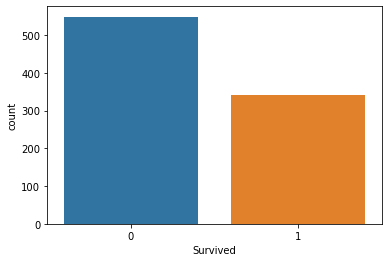

In [10]:
sns.countplot('Survived',data=train_data )


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<a id='5'></a><br>
# Chapter:2 Data Analysis

* Feature Analysis
* Corelation Between Features



<a id='6'></a><br>
## 1- Feature Analysis

* Sex - Survived
* Pclass - Survived
* Embarked - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Fare - Survived

### Sex - Survived

Female are more likely to survive than male.

In [12]:
data.select_dtypes(include=["int", "float64"]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


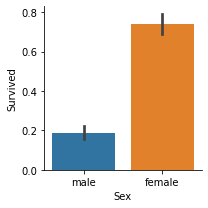

In [14]:
sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Pclass - Survived

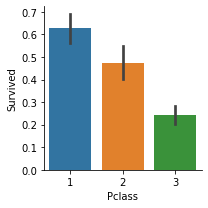

In [15]:
sns.factorplot(x="Pclass", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Embarked - Survived

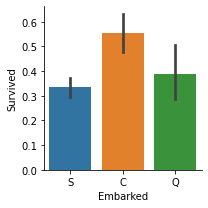

In [16]:
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### SibSp - Survived

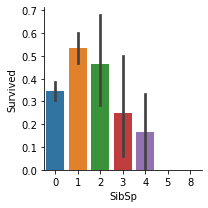

In [17]:
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Parch - Survived

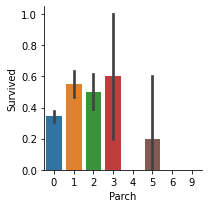

In [18]:
sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()

[](http://) ### Age - Survived

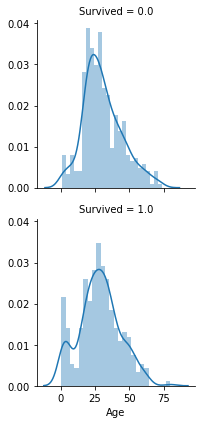

In [19]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

 ### Fare - Survived

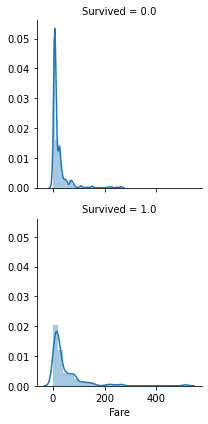

In [20]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

<a id='7'></a><br>
## 2-Correlation Between Features

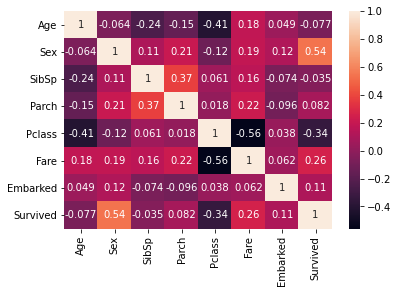

In [21]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

**Outcome**    

* Sex, Pclass, Fare and Embarked are associated with Survived. 




<a id='8'></a><br>
# Chapter-3 Missing Value

* Find Missing Value
* Fill Missing Value


<a id='9'></a><br>
## 1-Find Missing Value

* Age, Fare and Cabin have missing value. Therefore we are looking at the correlation matrix.

Correlation Matrix
* Pclass is associated with Fare.
* Embarked is not associated with any feature.
* Pclass and SibSp are associated with Age.

In [22]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id='10'></a><br>
## 2-Fill Missing Value

* Cabin has 1007 missing value
* Age has 256 missing value
* Embarked has 2 missing value
* Fare has 1 missing value

Not: Survived has 418 missing value (only test value)

### Fare Fill Value

Pclass is associated with Fare.

In [24]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [25]:
data["Fare"] = data["Fare"].fillna(np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Embarked Fill Value

Embarked is not associated with any feature.

S = 0,  C = 1 and Q = 2

In [26]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [27]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age Fill Value

Pclass and SibSp are associated with Age.

In [28]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


In [29]:
data_age_nan_index = data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"])].median()
    data["Age"].iloc[i] = mean_age

<a id='8'></a><br>
# Chapter-4 Data Engineering

* New Feature
* Edit Feature
* Drop Feature
* Normalization

<a id='12'></a><br>
## 1-New - Feature
* Alone and Family
* Title (Name)
* Age Limit
* Fare Limit

### Alone and Family 
* SibSp + Parch = family

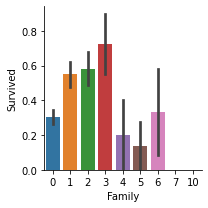

In [30]:
data["Family"] = data["SibSp"] + data["Parch"]
sns.factorplot(x="Family", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [31]:
data["Alone"] = [1 if i == 0 else 0 for i in data["Family"]]
data["Family"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


### Name - Title

In [32]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

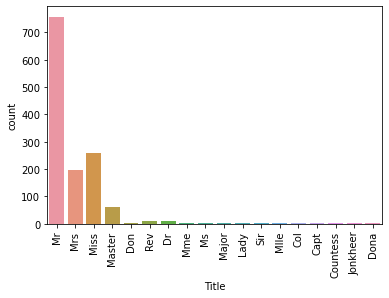

In [33]:
sns.countplot(data["Title"])
plt.xticks(rotation = 90)
plt.show()

In [34]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

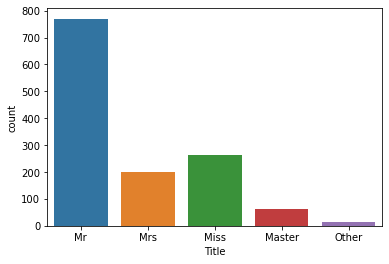

In [35]:
sns.countplot(data["Title"])
plt.show()

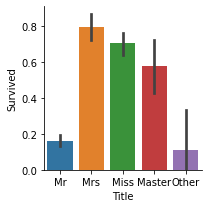

In [36]:
sns.factorplot(x="Title", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [37]:
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,2,3,1], inplace=True)


**### Age Limit

In [38]:
data['Age_Limit']=pd.cut(data['Age'], 5)
data.groupby(['Age_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Age_Limit,
"(0.0902, 16.136]",0.550000
"(16.136, 32.102]",0.336714
"(32.102, 48.068]",0.412844
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.090909


In [39]:
data['Age_Limit'] = LabelEncoder().fit_transform(data['Age_Limit'])


> ### Fare Limit

In [40]:
data['Fare_Limit']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Limit,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [41]:
data['Fare_Limit'] = LabelEncoder().fit_transform(data['Fare_Limit'])


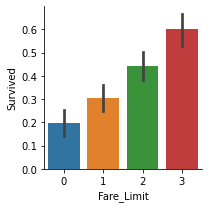

In [42]:
sns.factorplot(x="Fare_Limit", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Correlation Matrix

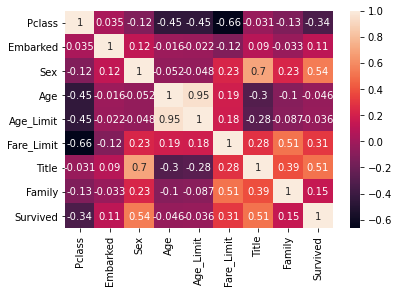

In [43]:
sns.heatmap(data[["Cabin","Pclass","Embarked","Sex","Age","Age_Limit","Fare_Limit", "Title","Family", "Survived"]].corr(), annot = True)
plt.show()

<a id='13'></a><br>
## 2- Drop Features
* Ticket, Cabin, Name, PassengerId and Age are deleted according to the result of the correlation matrix.

In [44]:
data['Age']=data['Age'].astype(int)

data.drop(labels=["SibSp","Parch","Cabin","Fare","Age", "Ticket", "Name", "PassengerId"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,Embarked,Family,Alone,Title,Age_Limit,Fare_Limit
0,0.0,3,0,0.0,1,0,1,1,0
1,1.0,1,1,1.0,1,0,2,2,3
2,1.0,3,1,0.0,0,1,2,1,1
3,1.0,1,1,0.0,1,0,2,2,3
4,0.0,3,0,0.0,0,1,1,2,1


<a id='14'></a><br>
## 3 - One Hot Encoding

In [45]:
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])
data = pd.get_dummies(data,columns=["Title"])

data.head()

,Survived,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Family_0,...,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3,Title_1,Title_2,Title_3
0,0.0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1.0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1.0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1.0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.0,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


<a id='16'></a><br>
# Chapter:5 Modeling

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<a id='17'></a><br>
## 1-Train Test Split

In [47]:
if len(data) == (len(train_data) + len(test_data)):
    print("success")

success


In [48]:
test = data[len(train_data):]
test.drop(labels="Survived", axis=1, inplace=True)

In [49]:
train = data[:len(train_data)]
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


<a id='18'></a><br>
## 2-Classificaiton Methods


* Logistic Regression
* Random Forest Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)

### Logistic Regression

In [50]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

Accuracy:  0.8134328358208955


### Random Forest Regression

In [51]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

Accuracy:  0.8134328358208955


### Support Vector Machine (SVM)

In [52]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

Accuracy:  0.8208955223880597


### KNN

elbow -> n:8 (the article will be updated)

In [53]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn


[0.7723880597014925,
 0.7388059701492538,
 0.7350746268656716,
 0.7761194029850746,
 0.8171641791044776,
 0.8171641791044776,
 0.8208955223880597,
 0.8208955223880597,
 0.8097014925373134,
 0.8097014925373134,
 0.8097014925373134]

In [54]:
knn_clsf = KNeighborsClassifier(n_neighbors=8)
knn_clsf.fit(X_train, y_train)
print("Accuracy: ", knn_clsf.score(X_test,y_test))

Accuracy:  0.8208955223880597


<a id='19'></a><br>
## 3- Ensemble Modeling

In [55]:
voting_classfication = VotingClassifier(estimators = [('knn', knn_clsf),('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

Accuracy:  0.8208955223880597


In [56]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission2.csv", index = False)

# Building New Models

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.744      0.856      0.576      0.80645161 0.80645161]
0.7577806451612904


In [59]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.784      0.896      0.76       0.7983871  0.84677419]
0.8170322580645163


In [60]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.784      0.896      0.76       0.7983871  0.84677419]
0.8170322580645163


In [61]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.776      0.84       0.744      0.78225806 0.81451613]
0.7913548387096775


In [62]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.776      0.84       0.744      0.78225806 0.81451613]
0.7913548387096775


In [63]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.808      0.84       0.776      0.81451613 0.82258065]
0.8122193548387097


In [64]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.808      0.84       0.776      0.81451613 0.82258065]
0.8122193548387097


In [65]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.808      0.856      0.752      0.78225806 0.83064516]
0.8057806451612904


In [66]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.808      0.856      0.752      0.78225806 0.83064516]
0.8057806451612904


In [67]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.896      0.784      0.79032258 0.84677419]
0.8234193548387096


In [68]:
svc_poly = SVC( probability = True, kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.896      0.784      0.79032258 0.84677419]
0.8234193548387096


In [69]:
svc_rbf = SVC( probability = True, kernel='rbf', gamma=0.5, C=0.1)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.896      0.784      0.79032258 0.84677419]
0.8234193548387096


In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.792      0.84       0.744      0.78225806 0.83870968]
0.7993935483870969


In [71]:
#Voting classifier takes all of the inputs and averages the results. 
#For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb),
                                            ('svc_poly', svc_poly), ('svc_rbf', svc_rbf) ], voting = 'soft') 

In [72]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.784      0.88       0.76       0.82258065 0.83870968]
0.8170580645161291


# Initial Results

In [73]:
svc_poly.fit(X_train,y_train)
test_result = pd.Series(svc_poly.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission.csv", index = False)

# Model Tuned Performance

In [74]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [75]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [76]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Logistic Regression
Best Score: 0.8250451612903227
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished


In [77]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KNN
Best Score: 0.8202709677419356
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.3s finished


In [78]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s


SVC
Best Score: 0.8314967741935483
Best Parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:    9.9s finished


In [79]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 10.3min finished


Random Forest
Best Score: 0.8218838709677421
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


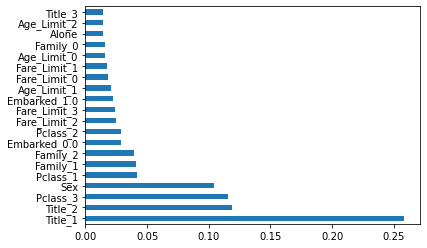

In [80]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [81]:
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [10],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  3.3min finished


XGB
Best Score: 0.8346580645161289
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


# Best Results

In [82]:
test_result = pd.Series(best_clf_xgb.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission1.csv", index = False)
